In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
DATA_FOLDER = os.environ["DATA_FOLDER"]

Data has no header -- had to dive into the documentation to get the column names (have snake-cased and saved to json). Helpfully, includes categories for categorical cols

In [2]:
with open("census_data_col_names.json", "r") as f:
    column_names = json.load(f)  # Copied from metadata file, except last col (added manually)

In [3]:
df_test = pd.read_csv(os.path.join(DATA_FOLDER, "census_income_test.csv"), names=column_names)
df_train = pd.read_csv(os.path.join(DATA_FOLDER, "census_income_learn.csv"), names=column_names)            

# Basic checks

In [5]:
df_test.head(5).T

,0,1,2,3,4
age,38,44,2,35,49
class_of_worker,Private,Self-employed-not incorporated,Not in universe,Private,Private
detailed_industry_recode,6,37,0,29,4
detailed_occupation_recode,36,12,0,3,34
education,1st 2nd 3rd or 4th grade,Associates degree-occup /vocational,Children,High school graduate,High school graduate
wage_per_hour,0,0,0,0,0
enroll_in_edu_inst_last_wk,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe
marital_stat,Married-civilian spouse present,Married-civilian spouse present,Never married,Divorced,Divorced
major_industry_code,Manufacturing-durable goods,Business and repair services,Not in universe or children,Transportation,Construction
major_occupation_code,Machine operators assmblrs & inspctrs,Professional specialty,Not in universe,Executive admin and managerial,Precision production craft & repair


In [6]:
df_train.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [7]:
df_test.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,15.332812,11.331118,54.461268,425.788577,35.919458,192.494727,1739.542838,1.956156,0.178505,1.519827,23.185331,94.500652
std,22.333449,18.026709,14.459589,270.202643,4616.795578,265.525252,1841.728492,994.900902,2.364331,0.558316,0.848229,24.389184,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1058.050000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.395000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2187.277500,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,2.000000,2.000000,52.000000,95.000000


### Not too different in the means, std, quartiles

In [8]:
df_train.dtypes == df_test.dtypes

age                                           True
class_of_worker                               True
detailed_industry_recode                      True
detailed_occupation_recode                    True
education                                     True
wage_per_hour                                 True
enroll_in_edu_inst_last_wk                    True
marital_stat                                  True
major_industry_code                           True
major_occupation_code                         True
race                                          True
hispanic_origin                               True
sex                                           True
member_of_a_labor_union                       True
reason_for_unemployment                       True
full_or_part_time_employment_stat             True
capital_gains                                 True
capital_losses                                True
dividends_from_stocks                         True
tax_filer_stat                 

In [9]:
df_train.notnull().mean()

age                                           1.0
class_of_worker                               1.0
detailed_industry_recode                      1.0
detailed_occupation_recode                    1.0
education                                     1.0
wage_per_hour                                 1.0
enroll_in_edu_inst_last_wk                    1.0
marital_stat                                  1.0
major_industry_code                           1.0
major_occupation_code                         1.0
race                                          1.0
hispanic_origin                               1.0
sex                                           1.0
member_of_a_labor_union                       1.0
reason_for_unemployment                       1.0
full_or_part_time_employment_stat             1.0
capital_gains                                 1.0
capital_losses                                1.0
dividends_from_stocks                         1.0
tax_filer_stat                                1.0


In [10]:
df_test.notnull().mean()

age                                           1.0
class_of_worker                               1.0
detailed_industry_recode                      1.0
detailed_occupation_recode                    1.0
education                                     1.0
wage_per_hour                                 1.0
enroll_in_edu_inst_last_wk                    1.0
marital_stat                                  1.0
major_industry_code                           1.0
major_occupation_code                         1.0
race                                          1.0
hispanic_origin                               1.0
sex                                           1.0
member_of_a_labor_union                       1.0
reason_for_unemployment                       1.0
full_or_part_time_employment_stat             1.0
capital_gains                                 1.0
capital_losses                                1.0
dividends_from_stocks                         1.0
tax_filer_stat                                1.0


### Will be putting instance_weight and year) to one side for the time being

### The thing we're interested in; target variable

In [11]:
df_test.income_details.value_counts(normalize=True)

income_details
- 50000.    0.937992
50000+.     0.062008
Name: proportion, dtype: float64

In [12]:
df_train.income_details.value_counts(normalize=True)

income_details
- 50000.    0.937942
50000+.     0.062058
Name: proportion, dtype: float64

A nice little imbalanced class problem :-)
<br>
#### Let's define the numerical/categorical features and have a look at distributions

# Now some more detailed bits...

In [4]:
numerical = ["age", "wage_per_hour", "capital_gains", "capital_losses", "dividends_from_stocks", "num_persons_worked_for_employer", "weeks_worked_in_year"]
categorical = [x for x in column_names if x not in numerical + ["instance_weight", "income_details", "year"]]
len(categorical)

32

### Numerical first

In [57]:
color_0 = "#E42929"
color_1 = "#4DC9C3"

In [66]:
over_50k = df_train[df_train["income_details"] == " 50000+."]
under_50k = df_train[df_train["income_details"] == " - 50000."]

def target_class_hists(feature_name, y_max=None):
    plt.figure()
    plt.hist(over_50k[feature_name].values, density=True, bins=20, color=color_1, alpha=0.5, label="over50k")
    plt.hist(under_50k[feature_name].values, density=True, bins=20, color=color_0, alpha=0.5, label="under50k")
    plt.legend()
    plt.title(f"{feature_name} distribution for classes")
    if y_max:
        plt.ylim(top=y_max)
    plt.xlabel("feature value")
    plt.ylabel("density")
    plt.xlim(0)
    plt.show()

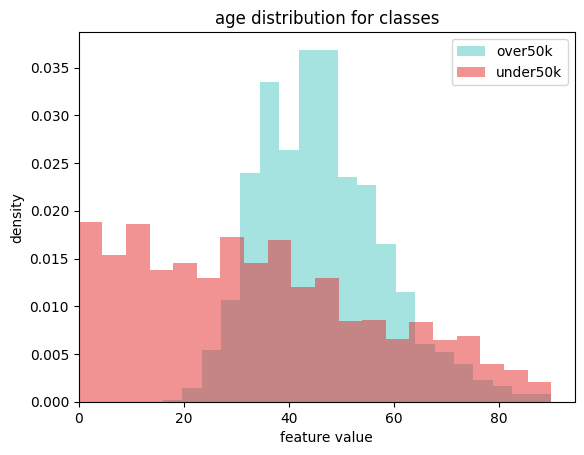

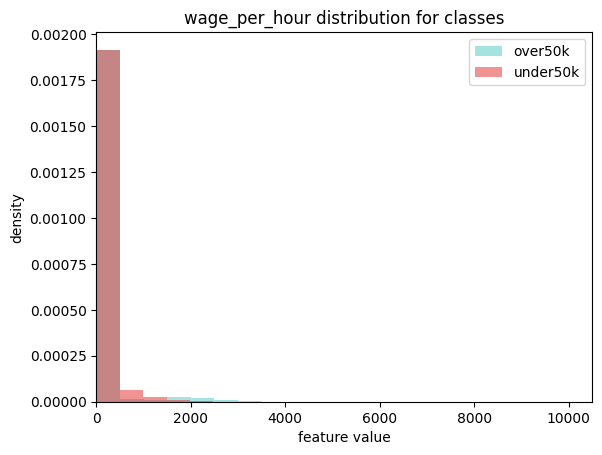

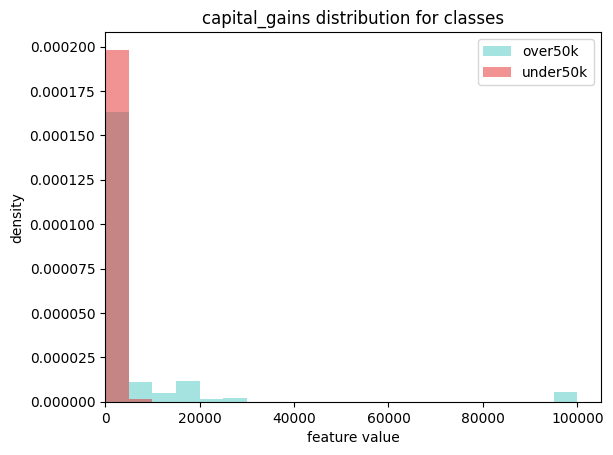

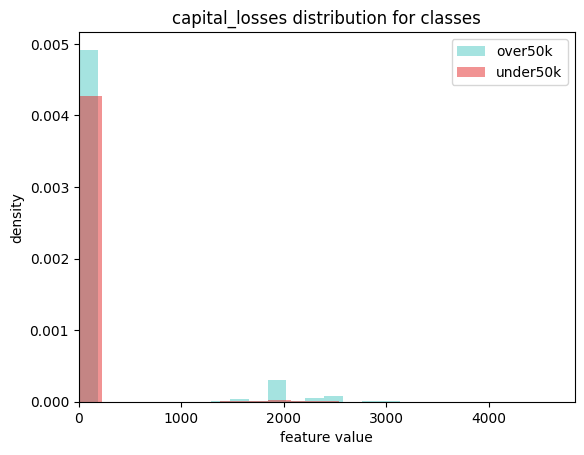

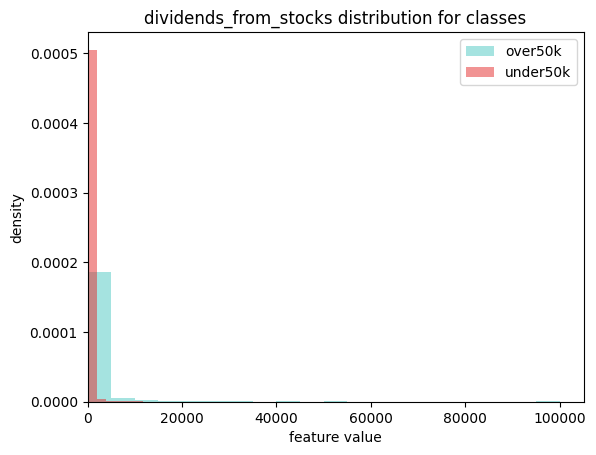

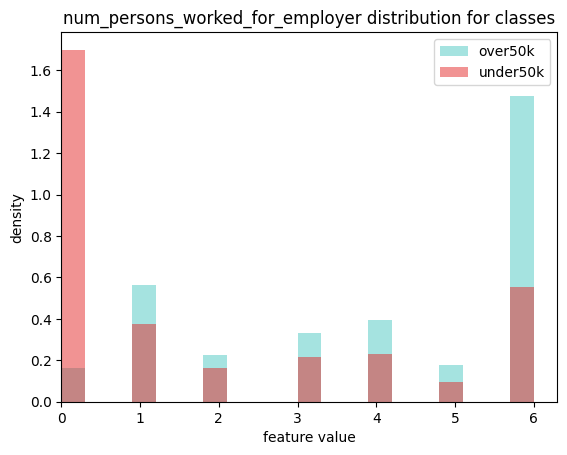

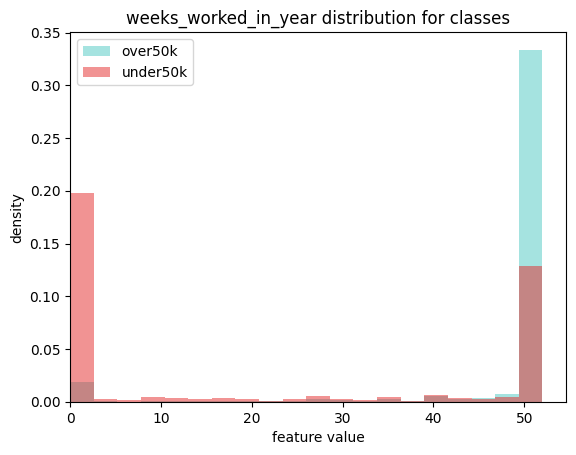

In [67]:
for f in numerical:
    target_class_hists(f)

Take 'em all for now. Wage per hour probably not as useful, but let's see. With numerical features, it's easier to just plug in
<br>
### Categorical next

In [70]:
def target_class_cat_bars(feature_name, y_max=None):
    categories = df_train[[feature_name]].drop_duplicates().reset_index(drop=True).sort_values(by=feature_name)  # Will join onto this to make sure all cats in both
    
    over_50k_counts = categories.merge(
        over_50k[feature_name]
        .value_counts(normalize=True)
        .reset_index(),
        on=feature_name,
        how="left"
    ).fillna(0)
    
    under_50k_counts = categories.merge(
        under_50k[feature_name]
        .value_counts(normalize=True)
        .reset_index(),
        on=feature_name,
        how="left"
    ).fillna(0)
    
    under_50k_counts[feature_name] = under_50k_counts[feature_name].astype(str)
    under_50k_counts[feature_name] = under_50k_counts[feature_name].astype(str)
    
    plt.figure()
    plt.bar(over_50k_counts[feature_name], over_50k_counts["proportion"], color=color_1, alpha=0.4, label="over50k")
    plt.bar(under_50k_counts[feature_name], under_50k_counts["proportion"], color=color_0, alpha=0.4, label="under50k")
    plt.legend()
    plt.title(f"{feature_name} distribution for classes")
    plt.xticks(rotation=90)
    if y_max:
        plt.ylim(top=y_max)
    plt.xlabel("category")
    plt.ylabel("density")
    plt.xlim(-0.5)
    plt.show()

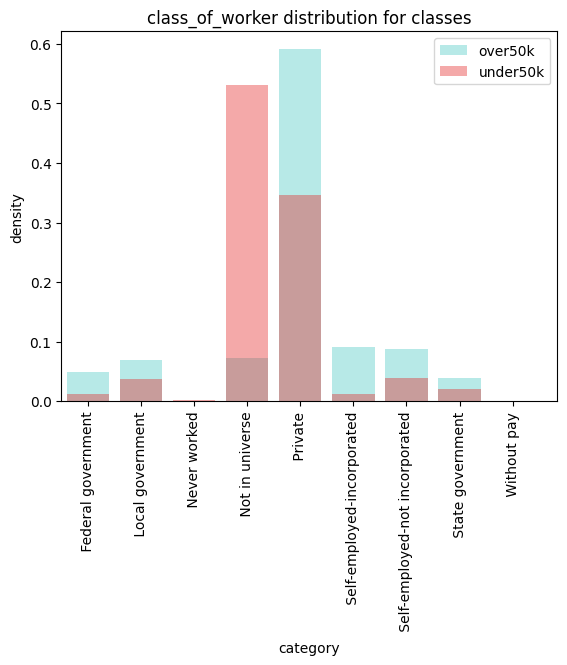

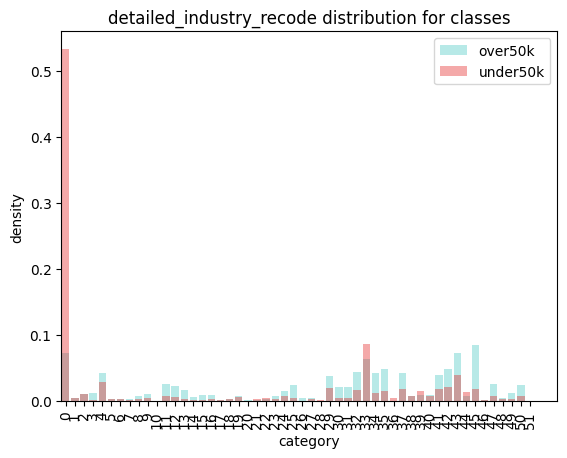

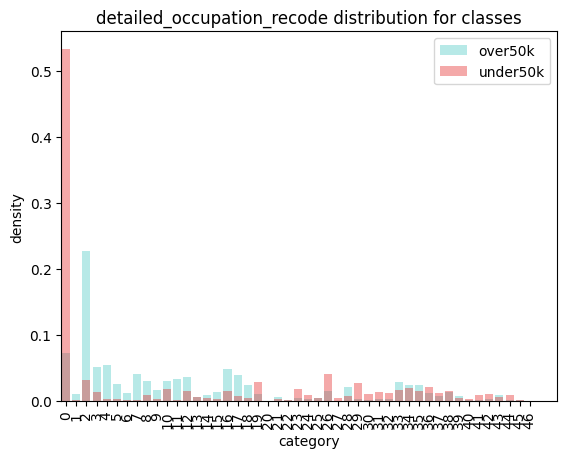

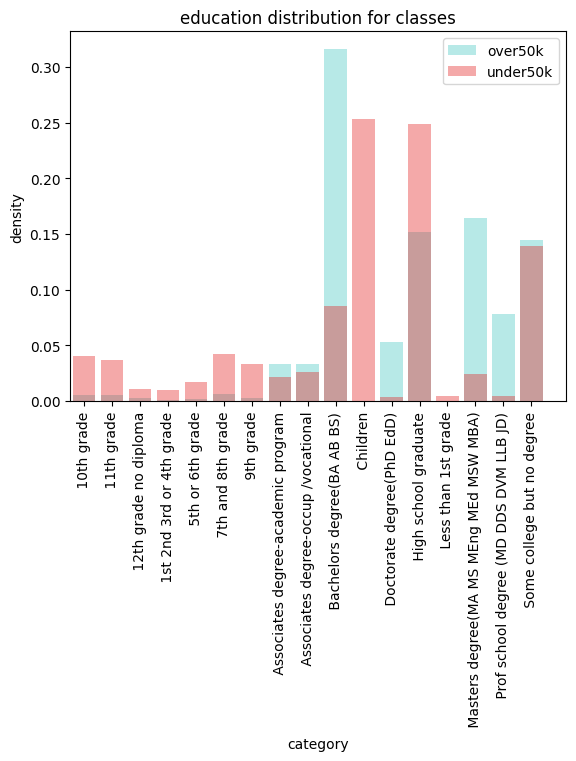

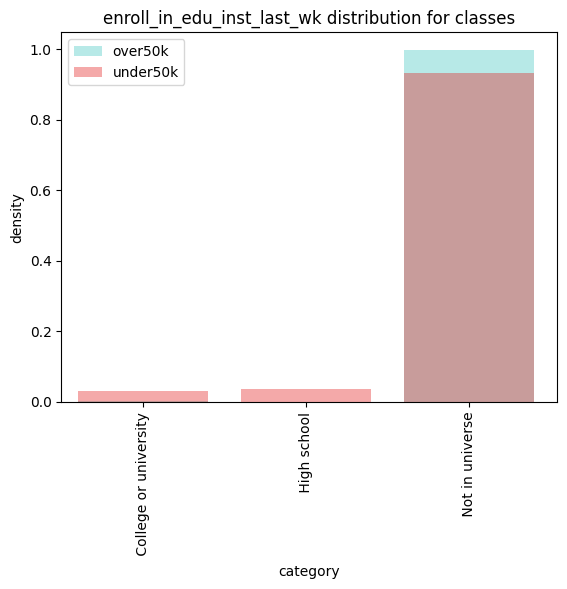

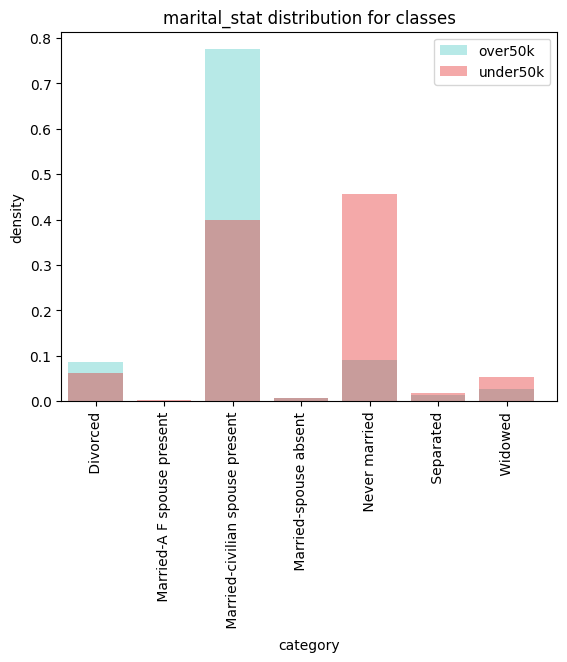

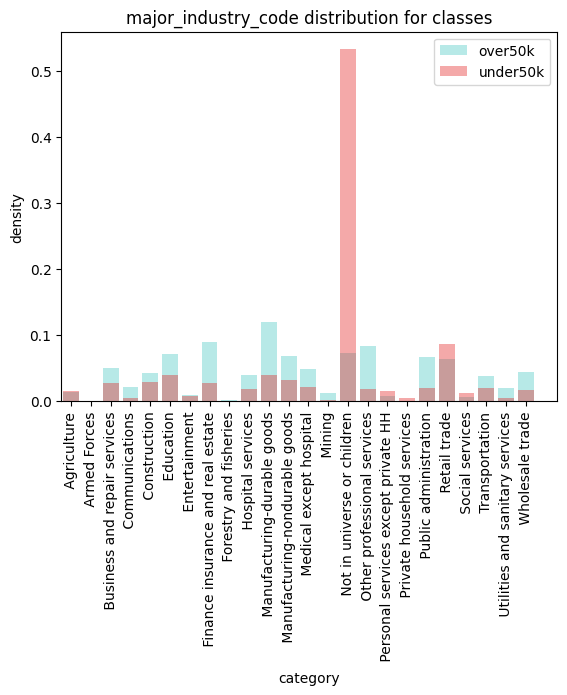

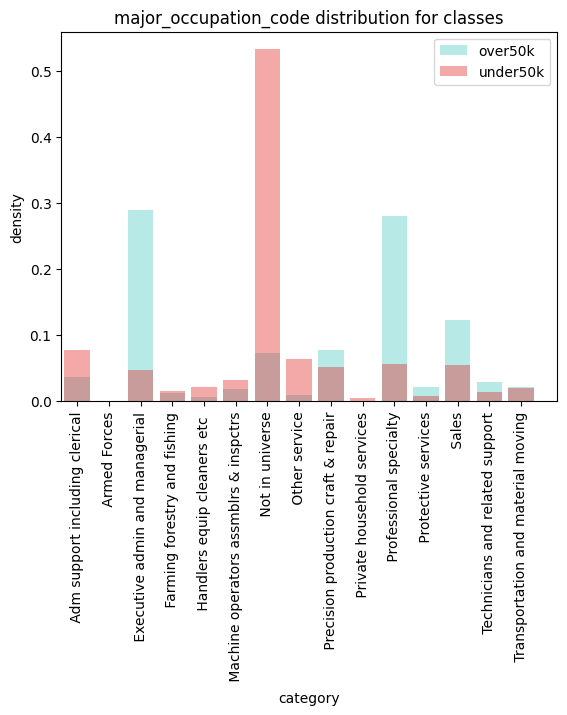

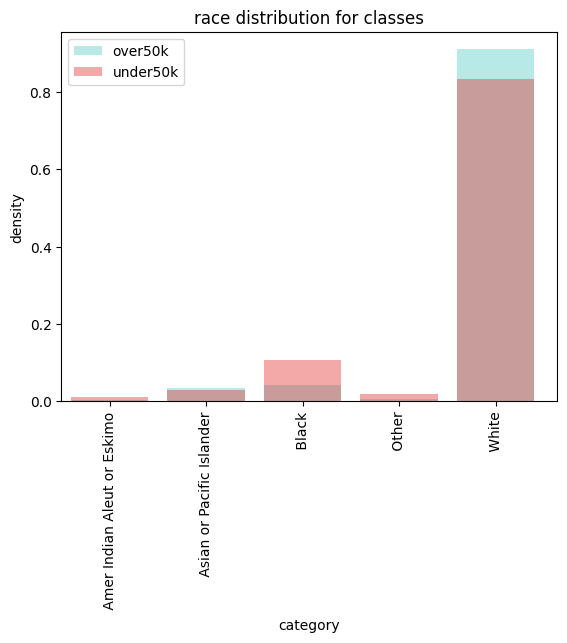

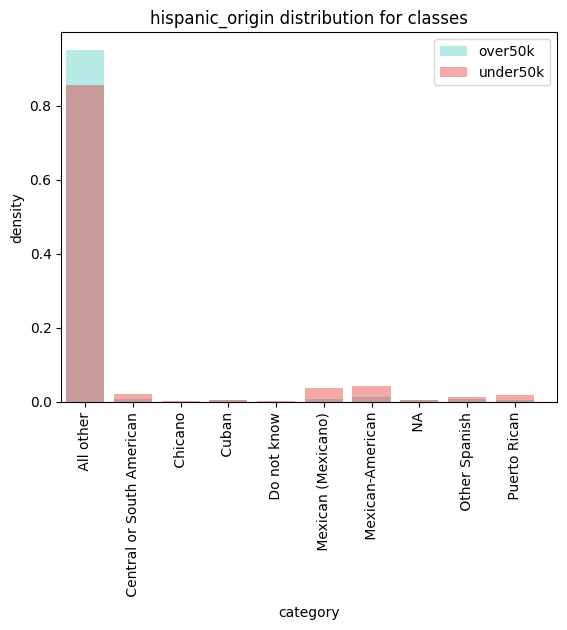

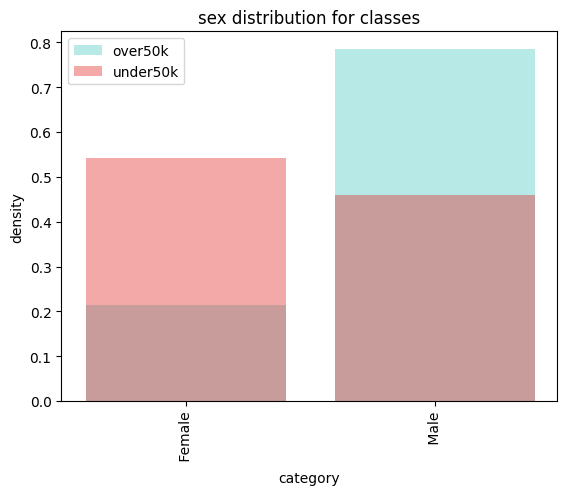

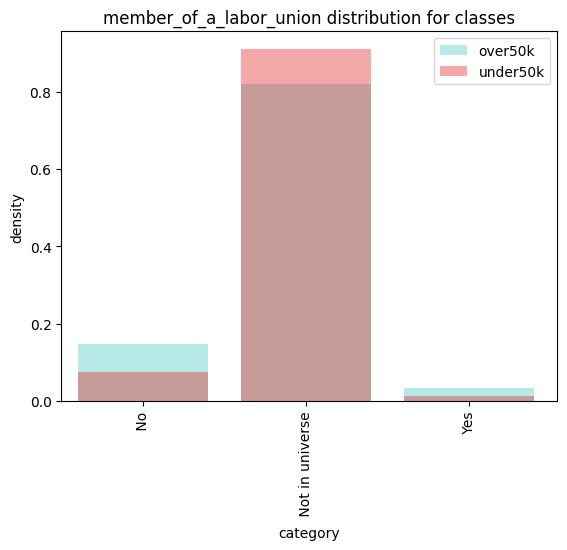

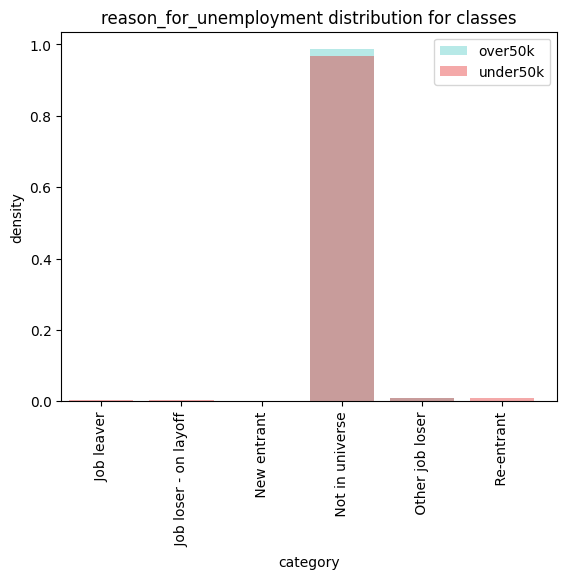

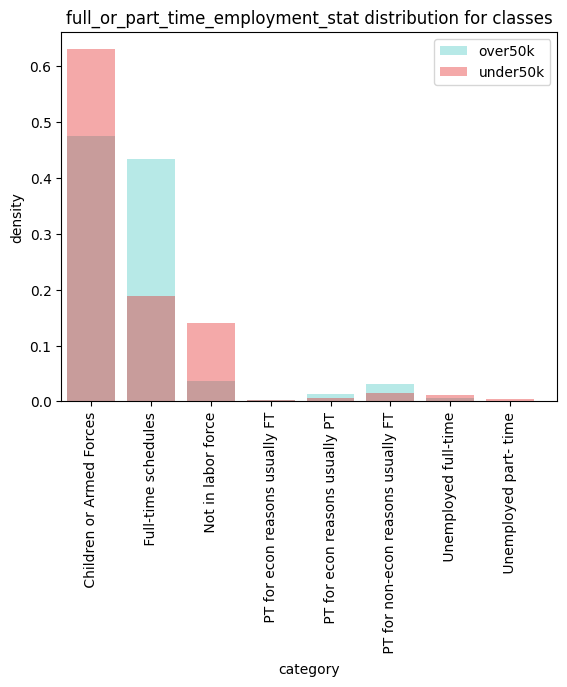

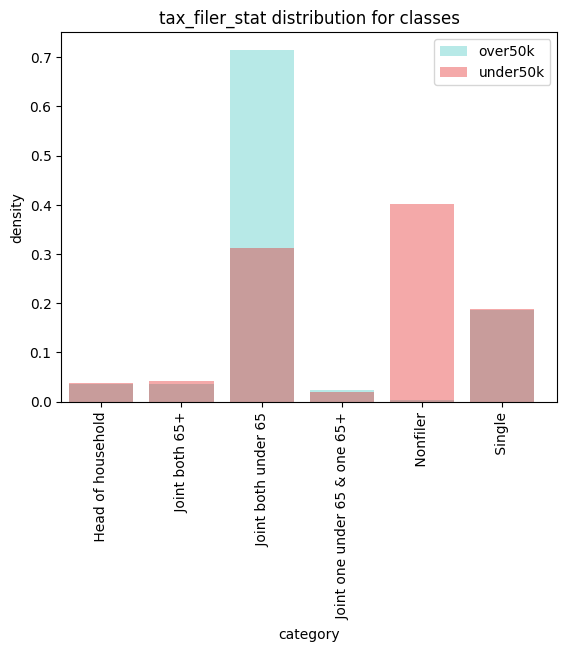

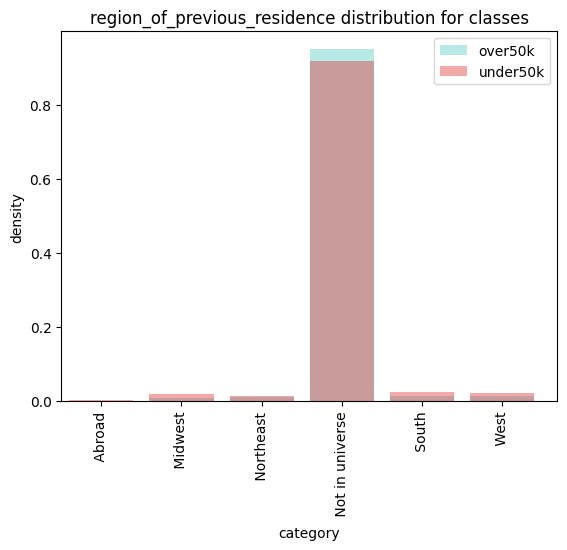

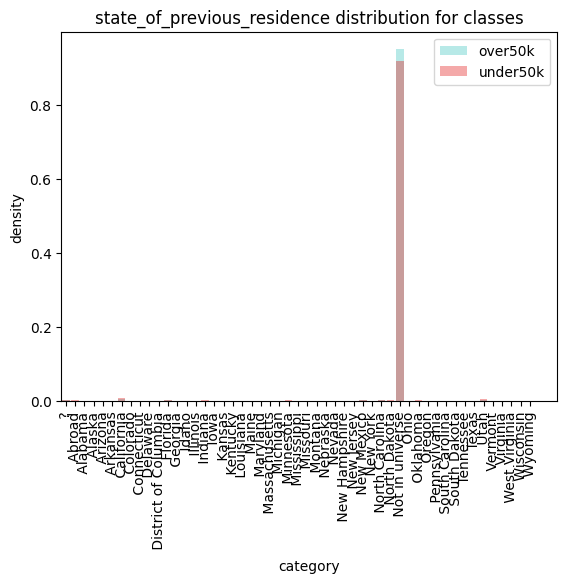

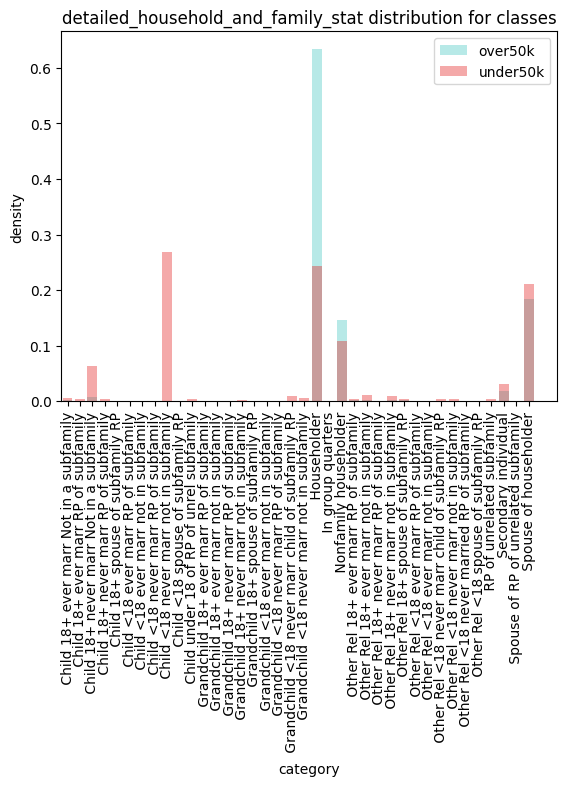

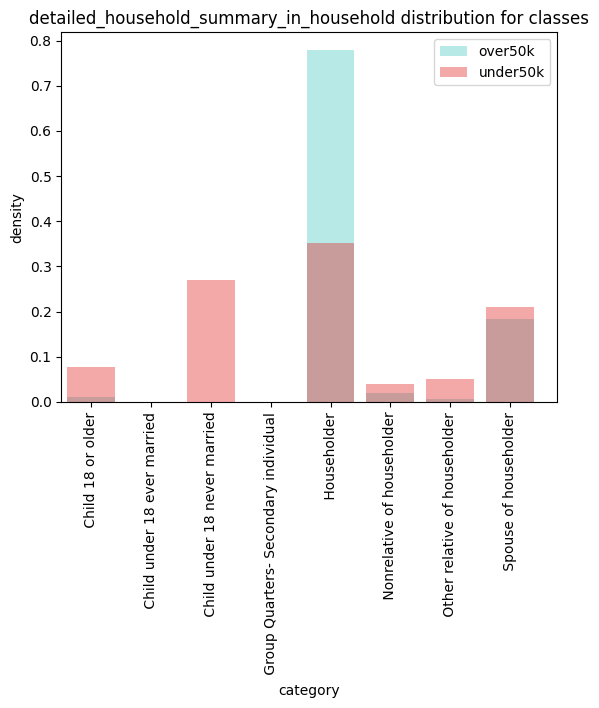

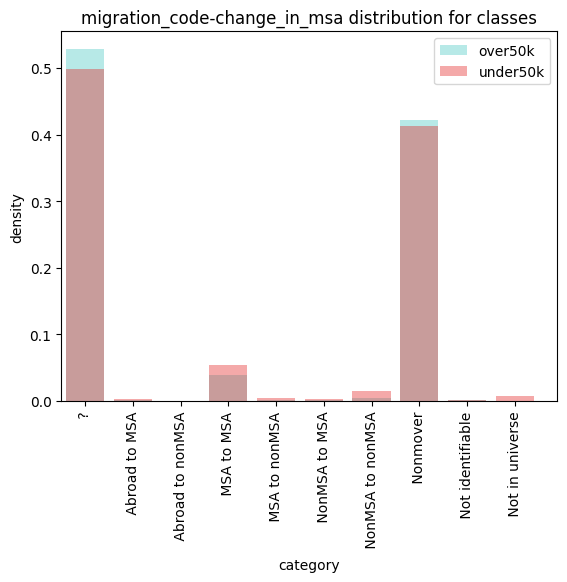

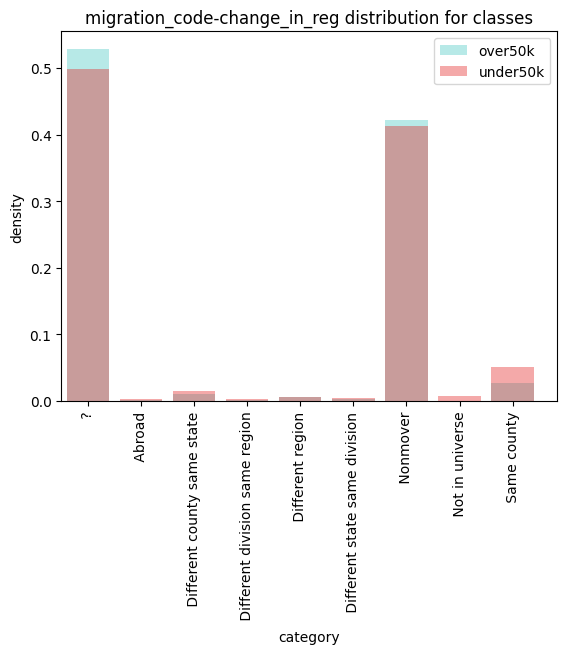

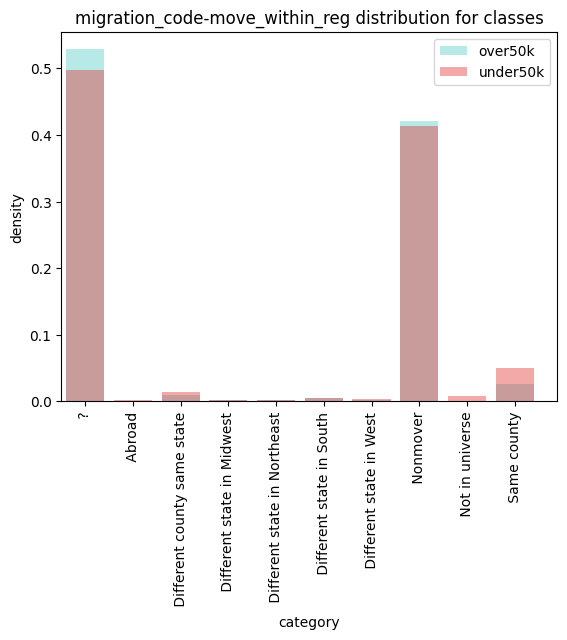

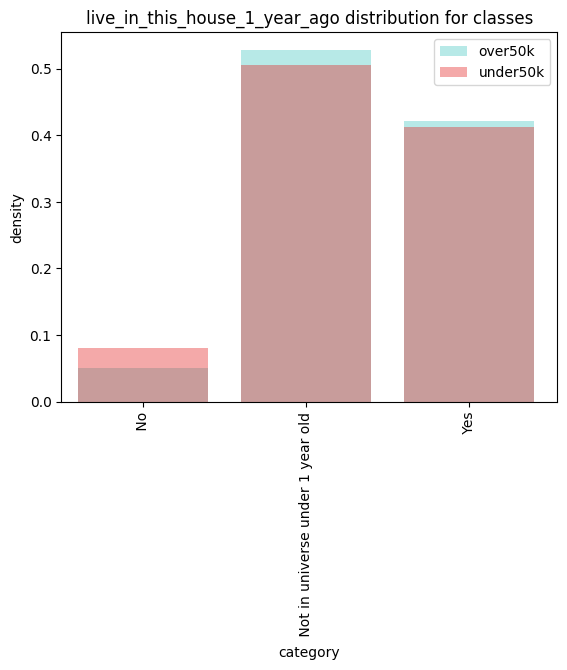

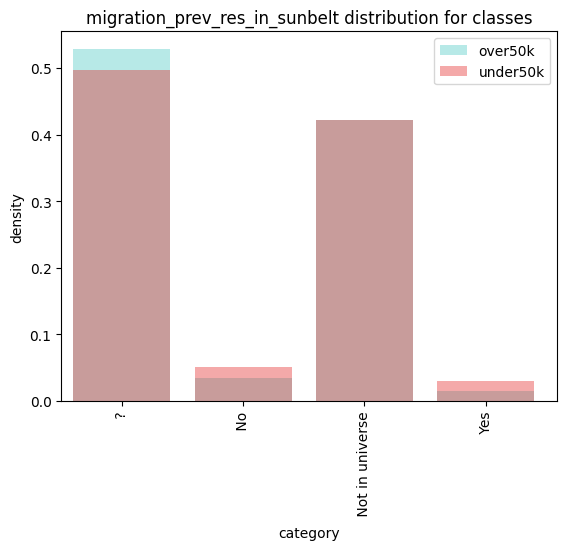

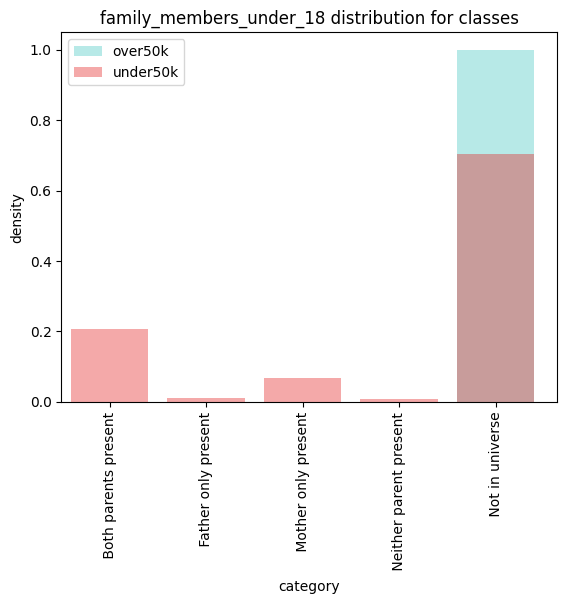

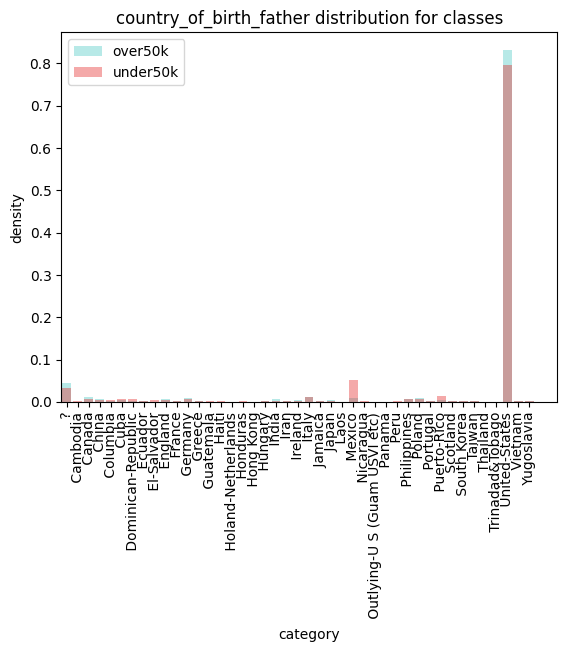

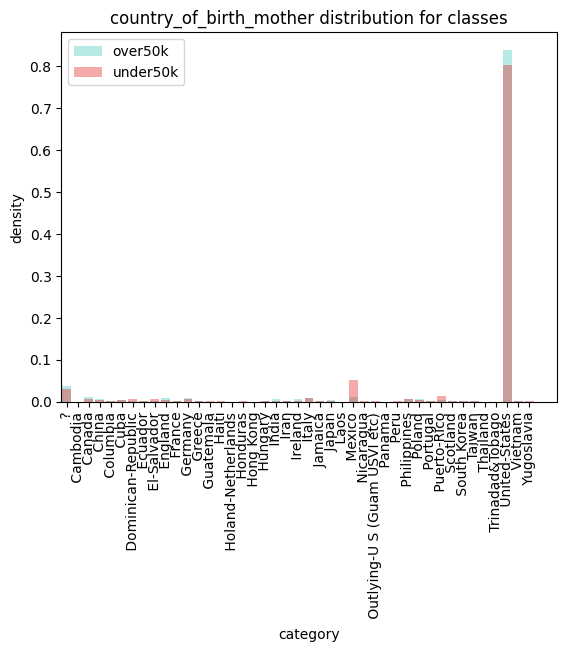

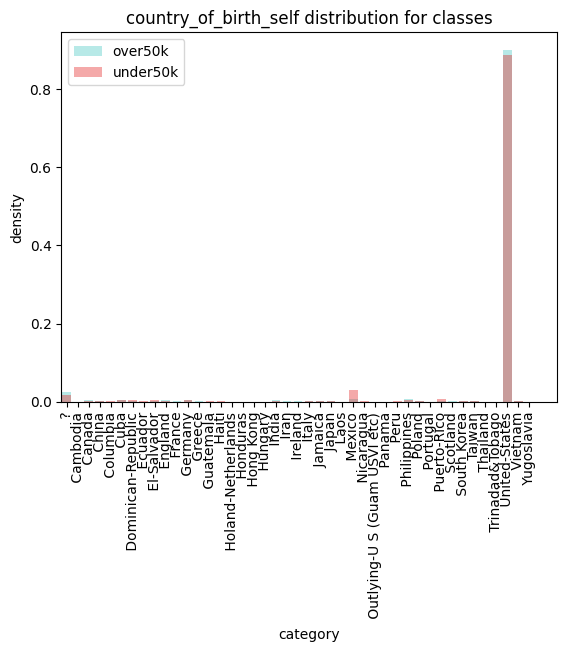

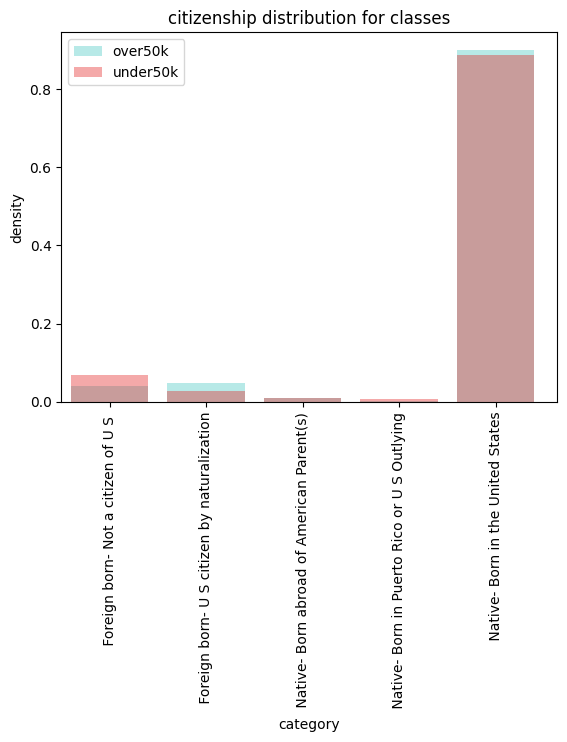

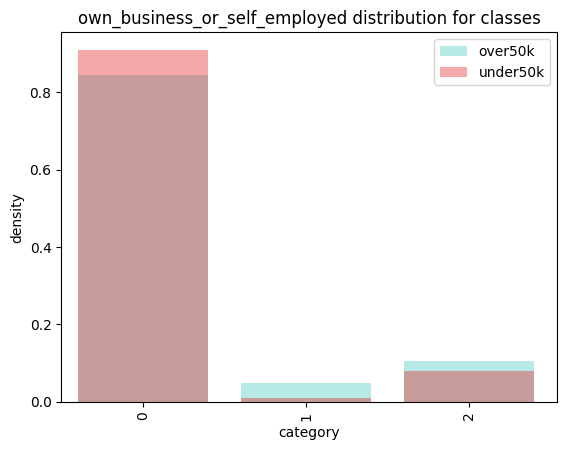

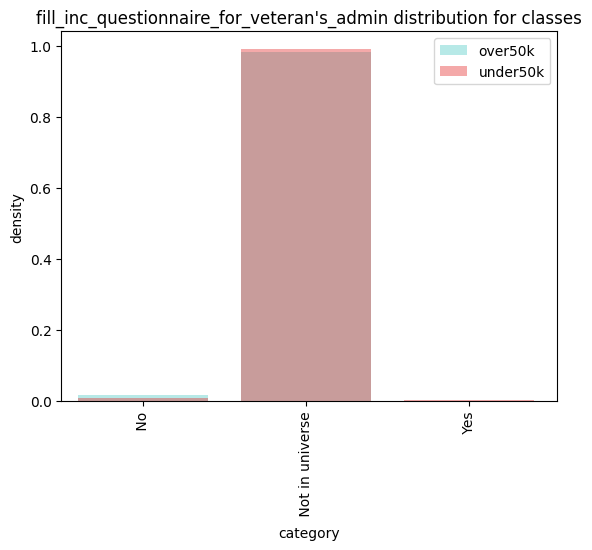

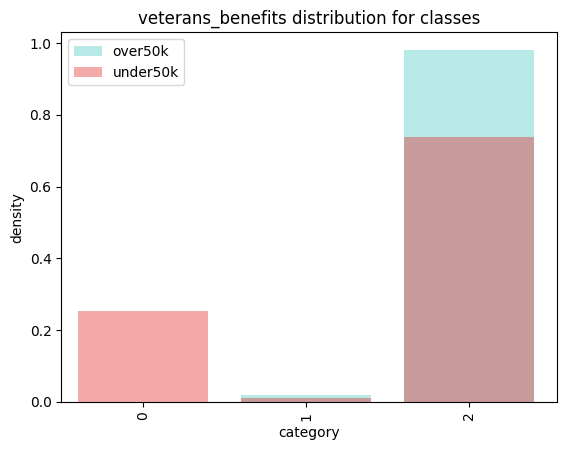

In [71]:
for f in categorical:
    target_class_cat_bars(f)

Much more interesting here. If only I had a nice GUI to browse it in ;-)

(Well, could mock up a Plotly plot, but... maybe save that for later -- results first!!)

#### Initial conclusions/feature ideas
##### Feature ---- Feature Engineering Idea/Commentary
- class of worker ---- not in universe flag (treat as binary)
- industry code ---- agriculture flag (+maybe real estate)
- occupation code ---- have to decode, but useful info in here!
- education ---- has university degree, Bachelors or higher (binary flag)
- enrolled in edu inst last wk ---- if they're enrolled (binary)
- marital status ---- ordinal; 0 never married 1 other 2 married spouse present
- major industry code ---- unknown or child (binary flag)
- major occupation code ---- ordinal; 0 not in universe/other service, 1 other, 2 exec admin/prof specialty/sales
- race ---- ignore for now
- hispanic Origin ---- ignore for now
- sex ---- binary; is male
- member of a labor union ---- ignore for now
- reason for unemployment ---- not predictive
- full or part time employment stat ---- ordinal; 0 not in labor, children, armed forces, 1 other, 2 full-time
- tax filer status ---- ordinal; 0 nonfiler, 1 other, 2 joint under 65
- region of previous residence ---- not predictive
- state of previous residence ---- not predictive
- detailed household and family stat ---- ordinal; 0 child, 1 other, 2 householder
- detailed household summary in household ---- maybe use this instead of previous -- very similar
- migration code-change in msa ---- not predictive
- migration code-change in reg ---- not predictive
- migration code-move within reg ---- not predictive
- live in this house 1 year ago ---- binary moved < 1yr ago
- migration prev res in sunbelt ---- not predictive
- family members under 18 ---- not in universe flag
- country of birth father ---- born in Mexico or Puerto Rico flag
- country of birth mother ---- born in Mexico or Puerto Rico flag
- country of birth self ---- born in Mexico or Puerto Rico flag
- citizenship ---- not too predictive
- own business or self employed ---- binary (1=yes)
- fill inc questionnaire for veteran's admin ---- not too predictive
- veterans benefits ---- 0 NIU, 1 yes, 2 no

A lot of the above are probably very highly correlated, so would act as proxies for one another (e.g. answers/categories that tell you that someone is a child). I'll try not to include too many duplicates (with more time, I might look at correlations specifically, or iterate where I build a model, look at feature importances within a highly-correlated subset, and only take the most predictive to the next iteration)

(PS: just a quick zoom on a couple of these)

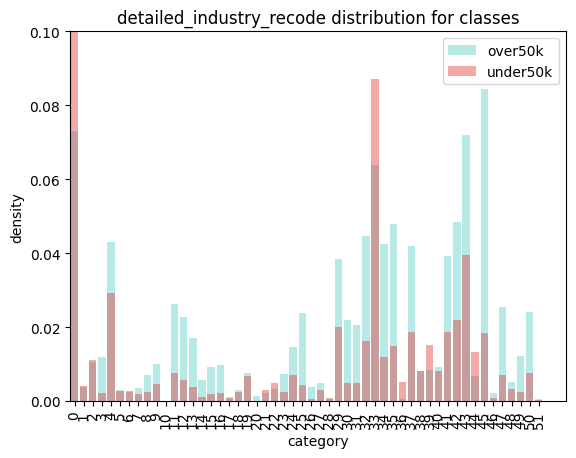

In [72]:
target_class_cat_bars("detailed_industry_recode", y_max=0.1)

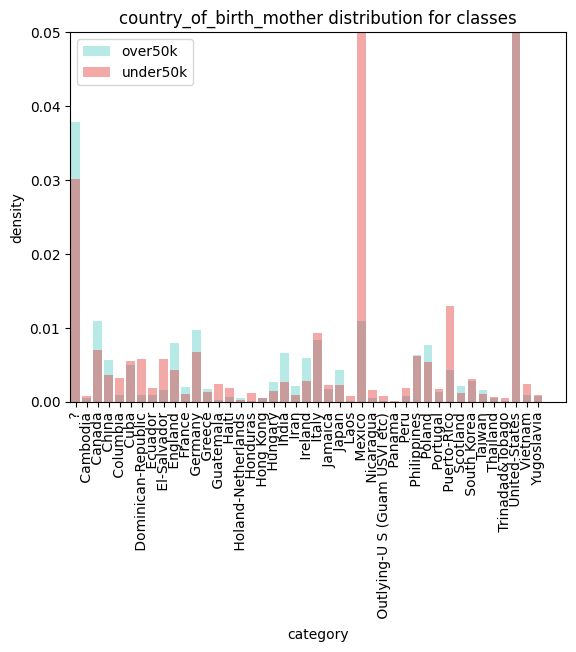

In [73]:
target_class_cat_bars("country_of_birth_mother", y_max=0.05)

### Time to write some preprocessing code -- see preprocessor.py

# There is actually something else I'd like to check -- just how much variation is there in the categorical/numerial features. OHE the categoricals, then maybe a PCA+scree plot?

In [5]:
from preprocessor import CensusPreprocessor

In [14]:
ohe_all_config = dict()
for feat in categorical:
    ohe_all_config[feat] = {"processor": "ohe"}
    
ohe_cats_processor = CensusPreprocessor(ohe_all_config)
ohe_cats_df = ohe_cats_processor.prepare_dataframe(df_train)

In [7]:
ohe_cats_df

,class_of_worker_Federal government,class_of_worker_Local government,class_of_worker_Never worked,class_of_worker_Not in universe,class_of_worker_Private,class_of_worker_Self-employed-incorporated,class_of_worker_Self-employed-not incorporated,class_of_worker_State government,class_of_worker_Without pay,detailed_industry_recode_0,...,citizenship_Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veteran's_admin_No,fill_inc_questionnaire_for_veteran's_admin_Not in universe,fill_inc_questionnaire_for_veteran's_admin_Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2
0,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
199519,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
199520,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
199521,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()

In [10]:
pcad_arr = pca.fit_transform(ohe_cats_df.values)
pcad_arr.shape

(199523, 501)

Text(0, 0.5, 'PC eigenvalue')

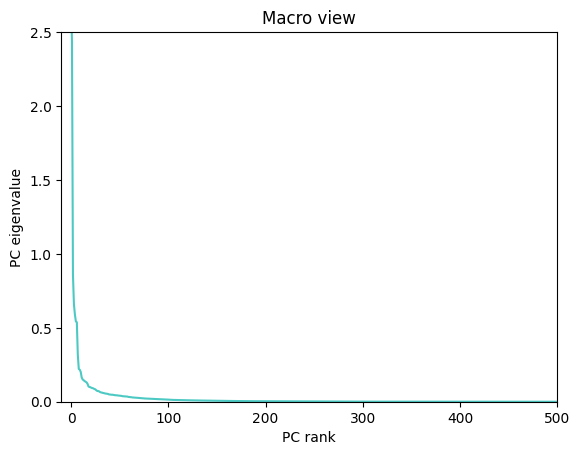

In [79]:
plt.plot(pca.explained_variance_, "#4DC9C3")
plt.ylim(0, 2.5)
plt.xlim(-10, 500)
plt.title("Macro view")
plt.xlabel("PC rank")
plt.ylabel("PC eigenvalue")

Text(0, 0.5, 'PC eigenvalue')

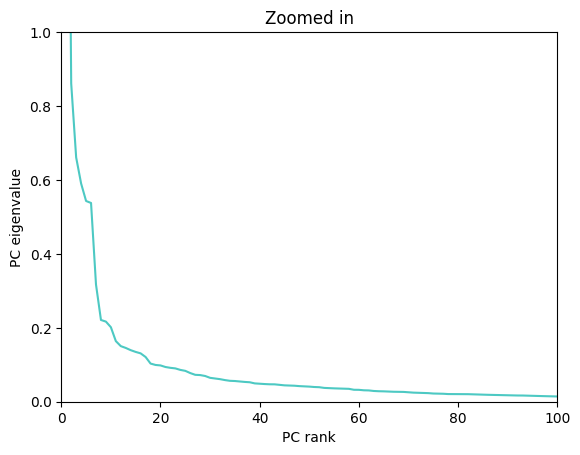

In [78]:
plt.plot(pca.explained_variance_, "#4DC9C3")
plt.ylim(0, 1)
plt.xlim(0, 100)
plt.title("Zoomed in")
plt.xlabel("PC rank")
plt.ylabel("PC eigenvalue")

### Worth remembering -- reducing correlation and singling out predictive features is not the same thing, but good to know that we only have maybe ~20 useful OHE dimensions (of 500)

TODO: check which OHE features correlate most closely with the first ~20 PCs, and cross-reference with the class-distribution analysis, above